### Import Modules

In [2]:
import  matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import numpy as np
import pickle

from common6 import file_exists, record_results
from common6 import test_mean, y_test, X_resampled_mean, y_resampled
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

/Users/tim/src/Metis/Project_3/Notebooks/common6.py:50: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_test_scaled = mean_scale.transform(X_test)


### Locate Best Model

In [3]:
filepath = '/Users/tim/src/Metis/Project_3/models/records/model_history2.pkl'
with open(filepath, 'rb') as pkl:
    rec = pickle.load(pkl)

In [4]:
rec

,Model,Hyperparameters,Target,Features,Observations,Train Balance,Train_AUC,CV_AUC,Notes
0,Logistic Regression,"{'C': 0.01, 'penalty': 'l2', 'random_state': 200}",coup,23,4110,"{0: 4025, 1: 85}",0.894510,0.860350,Round 1: Missing data imputed with global mean...
1,Logistic Regression,"{'C': 0.1, 'penalty': 'l1', 'random_state': 200}",coup,23,8050,"{0: 4025, 1: 4025}",0.875720,0.873960,Round 2: Missing data imputed with global mean...
2,Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'random_state': 200}",coup,23,8050,"{0: 4025, 1: 4025}",0.882110,0.880260,Round 3: Missing data imputed with global mean...
3,Logistic Regression,"{'C': 0.001, 'penalty': 'l2', 'random_state': ...",coup,23,8061,"{0: 4025, 1: 4036}",0.853870,0.823550,Round 4: Missing data imputed with global mean...
4,Logistic Regression,"{'C': 0.01, 'penalty': 'l2', 'random_state': 200}",coup,23,4110,"{0: 4025, 1: 85}",0.860350,0.843267,Round 5: Missing data imputed with global medi...
5,Decision Tree,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",coup,23,4110,"{0: 4025, 1: 85}",0.876640,0.814810,Round 1: Missing data imputed with global mean...
6,Decision Tree,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",coup,23,8050,"{0: 4025, 1: 4025}",0.911870,0.918860,Round 2: Missing data imputed with global mean...
7,Decision Tree,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",coup,23,8050,"{0: 4025, 1: 4025}",0.935240,0.930220,Round 3: Missing data imputed with global mean...
8,Decision Tree,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",coup,23,8061,"{0: 4025, 1: 4036}",0.902180,0.854010,Round 4: Missing data imputed with global mean...
9,Decision Tree,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",coup,23,4110,"{0: 4025, 1: 85}",0.876640,0.814810,Round 5: Missing data imputed with global medi...


In [5]:
rec.Hyperparameters.iloc[13]

{'learning_rate': 0.04,
 'max_depth': 7,
 'n_estimators': 300,
 'random_state': 200}

### Run Test Data

In [6]:
# Instantiate
gb = GradientBoostingClassifier(learning_rate= 0.04, max_depth =7, n_estimators = 300, random_state = 200)

# Fit
gb.fit(X_resampled_mean, y_resampled)

#Predict
gb_pred = gb.predict(test_mean)

In [7]:
auc = roc_auc_score(y_resampled, gb.predict_proba(X_resampled_mean)[:, 1])
auc

0.9999470699432892

In [8]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1007
           1       0.00      0.00      0.00        21

   micro avg       0.98      0.98      0.98      1028
   macro avg       0.49      0.50      0.49      1028
weighted avg       0.96      0.98      0.97      1028



/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Plot Confusion Matrix

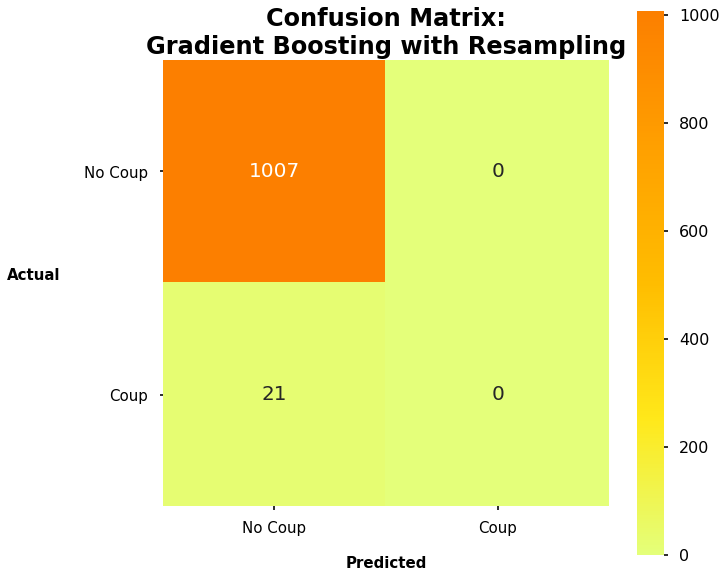

In [136]:
confusion = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(10,10))
matrix = sns.heatmap(confusion, cmap=plt.cm.Wistia, annot=True, annot_kws={"size": 20}, square=True, fmt='g',
           xticklabels=['No Coup', 'Coup'],
           yticklabels=['No Coup', 'Coup'])
plt.xticks(fontsize=15, rotation = 0)
plt.yticks(fontsize=15, rotation = 0)
plt.xlabel('Predicted', fontsize=15, fontweight="bold", labelpad=20)
plt.ylabel('Actual',  fontsize=15, fontweight="bold", rotation=0, labelpad = 50)
plt.title('Confusion Matrix:\nGradient Boosting with Resampling', fontsize = 24, fontweight="bold")

matrix = matrix.get_figure()  
matrix.savefig("rmatrix.png", format='png', bbox_inches='tight');

### Plot ROC Curve

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(test_mean)[:,1])

NameError: name 'gb' is not defined

In [5]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(10,10))
roc_bad = plt.plot(fpr, tpr,lw=2)

plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False\nPositive\nRate', fontsize=15, fontweight="bold", labelpad=20)
plt.ylabel('True\nPositive\nRate', fontsize=15, fontweight="bold", rotation=0, labelpad = 50)
plt.title('ROC Curve:\nGradient Boosting with Resampling', fontsize = 24, fontweight="bold")
roc_bad = auc.get_figure()  
roc_bad.savefig("roc_bad.png", format='png', bbox_inches='tight');

NameError: name 'fpr' is not defined

<Figure size 720x720 with 0 Axes>

### Plot CV AUCs

In [62]:
filepath = '/Users/tim/src/Metis/Project_3/models/records/model_history2.pkl'
with open(filepath, 'rb') as pkl:
    rec = pickle.load(pkl)

In [63]:
rec.sort_values(by=['CV_AUC'], ascending=False, inplace=True)
rec.reset_index(inplace=True, drop=True)
cv_df = rec.groupby('Model').first()


In [64]:
cv_df.reset_index(inplace=True)
cv_df

,Model,Hyperparameters,Target,Features,Observations,Train Balance,Train_AUC,CV_AUC,Notes
0,Bagging,"{'bootstrap': False, 'max_features': 15, 'max_...",coup,23,"(8050,)","{0: 4025, 1: 4025}",0.998049,0.997005,Round 2: Missing data imputed with global mean...
1,Decision Tree,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",coup,23,8050,"{0: 4025, 1: 4025}",0.935240,0.930220,Round 3: Missing data imputed with global mean...
2,Gradient Boosting,"{'learning_rate': 0.04, 'max_depth': 7, 'n_est...",coup,23,"(8050,)","{0: 4025, 1: 4025}",0.999947,0.999437,Round 2: Missing data imputed with global mean...
3,K-Nearest Neighbors,"{'algorithm': 'brute', 'leaf_size': 5, 'n_neig...",coup,23,"(8050,)","{0: 4025, 1: 4025}",0.998634,0.988303,Round 2: Missing data imputed with global mean...
4,Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'random_state': 200}",coup,23,8050,"{0: 4025, 1: 4025}",0.882110,0.880260,Round 3: Missing data imputed with global mean...


In [71]:
cv_df = cv_df[['Model','Train_AUC', 'CV_AUC']]
cv_df.sort_values(by=['CV_AUC'], ascending=False, inplace=True)
cv_df

,Model,Train_AUC,CV_AUC
2,Gradient Boosting,0.999947,0.999437
0,Bagging,0.998049,0.997005
3,K-Nearest Neighbors,0.998634,0.988303
1,Decision Tree,0.935240,0.930220
4,Logistic Regression,0.882110,0.880260


In [ ]:
# import seaborn as sns
# sns.set(style="whitegrid")

# g = sns.catplot(x='Model', hue="Model", data=cv_df,
#                 height=6, kind="bar", palette="muted")
# g.despine(left=True)
#g.set_ylabels("")

In [ ]:
# sns.barplot(data=cv_df, x="variable", y="value", hue="index")

# plt.show()

<Figure size 720x720 with 0 Axes>

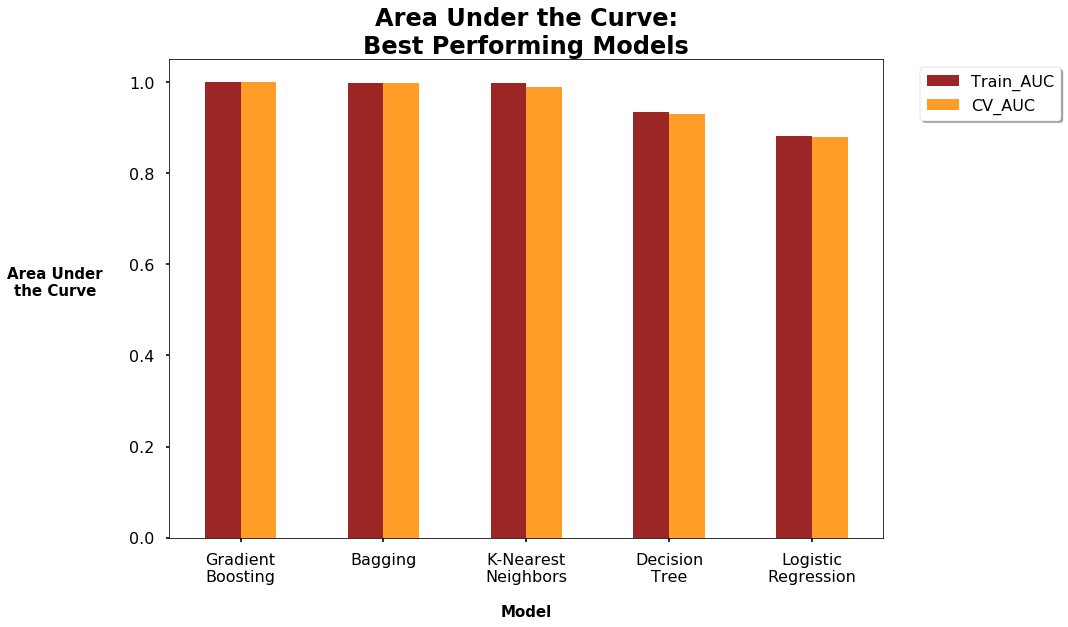

In [133]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(10,10))
auc = cv_df.plot.bar(color = ['darkred', 'darkorange'], alpha = 0.85)
plt.title('Area Under the Curve:\nBest Performing Models',fontweight="bold", fontsize = 24)
plt.xlabel('Model', fontsize=15, fontweight="bold", labelpad=20)
plt.ylabel('Area Under\nthe Curve', fontsize=15, fontweight="bold", rotation=0, labelpad = 74);
plt.xticks(np.arange(5), ('Gradient\nBoosting', 'Bagging', 'K-Nearest\nNeighbors', 'Decision\nTree', 'Logistic\nRegression'), rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)
auc = auc.get_figure()  
auc.savefig("auc_bad.png", format='png', bbox_inches='tight');